<div class="alert alert-block alert-info">  
    <h1><strong>👨‍💻 Getting Started with Employee Promotion</strong></h1>
    <i></i>
</div>

# <img src="https://sherwoodlumber.com/wp-content/uploads/2020/02/2016-10-24-employee-promotions-best-practices.png">

<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h4> We are uisng the following versions of the libraries:</h4>

- numpy == 1.18.5 

- pandas == 1.1.3

- seaborn ==0.11.0

<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library 
<h5> Like if you wanted to install numpy? </h5>
- pip install numpy

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [2]:
data = pd.read_csv("/kaggle/input/employees-evaluation-for-promotion/employee_promotion.csv", encoding = "ISO-8859-1", engine="python")

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎 📊</strong></center></h2>
        
</div>

#### Five top records of data

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


#### Five last records of data

In [4]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


#### Coloumns/features in data

In [5]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

#### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 54808


#### Shape of data

In [7]:
data.shape

(54808, 13)

#### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


#### Data types of all coloumns

In [9]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

#### Checking Null values / missing values

In [10]:
np.sum(data.isnull().any(axis=1))

8428

#### Counts of missing values in each column

In [11]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

#### Rows and columns in the dataset

In [12]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   13


In [13]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   54808


#### Data Description

In [14]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## Univariate Analysis 

#### Numeric features distrubution 

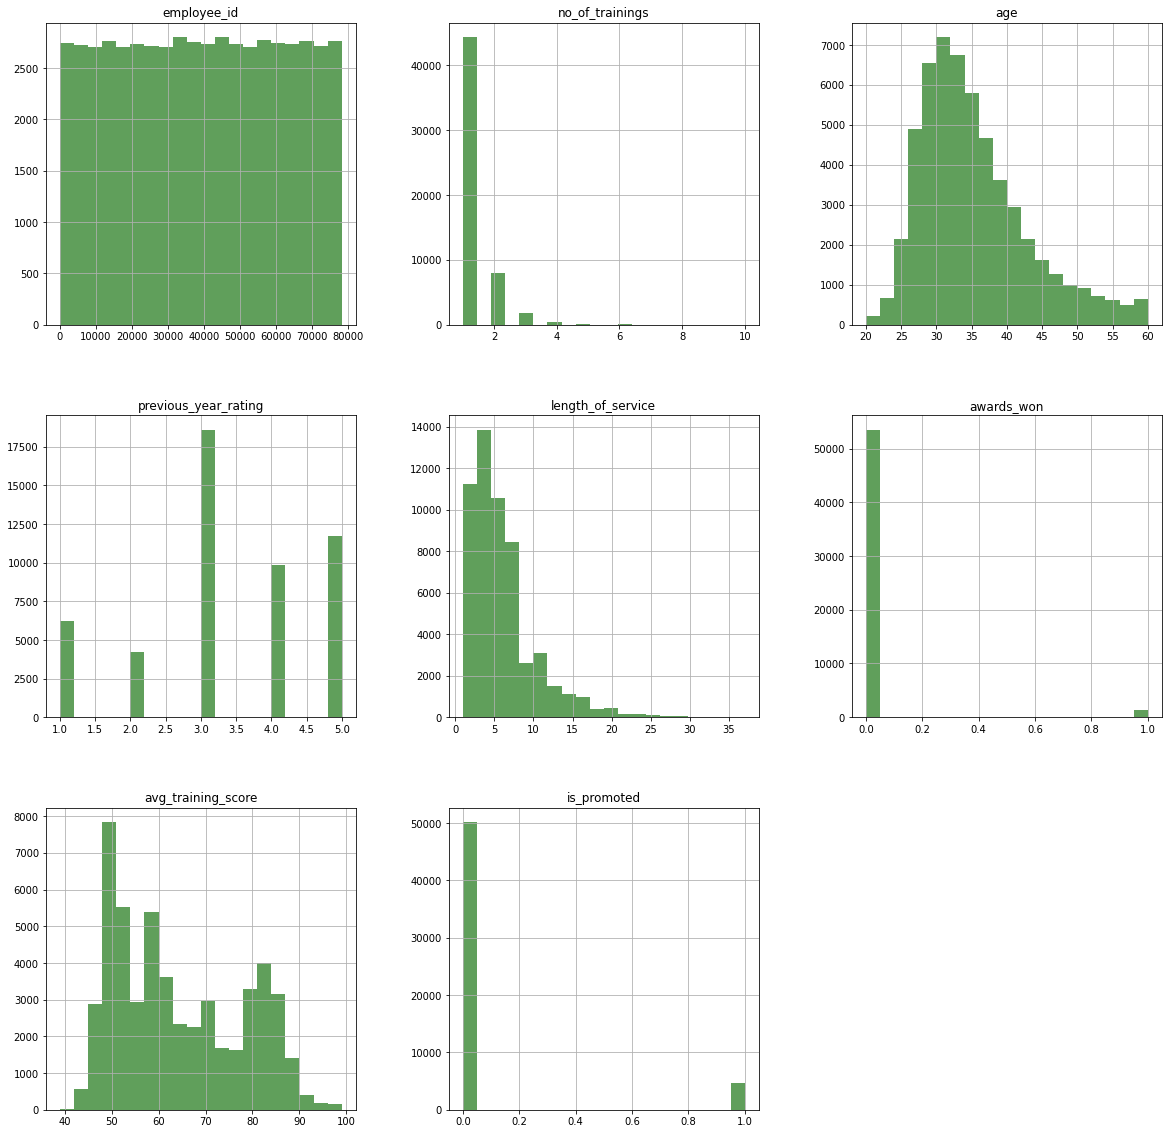

In [15]:
data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

### As we can see above, there are the values ranges of all features. Every feature have different distribution of values. To understand the features better and deeper, we are going to look at each one separately. 

### department distribution

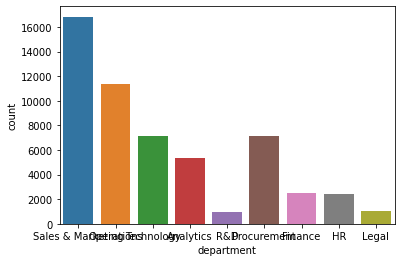

In [16]:
sns.countplot(data= data, x = "department")
plt.show()

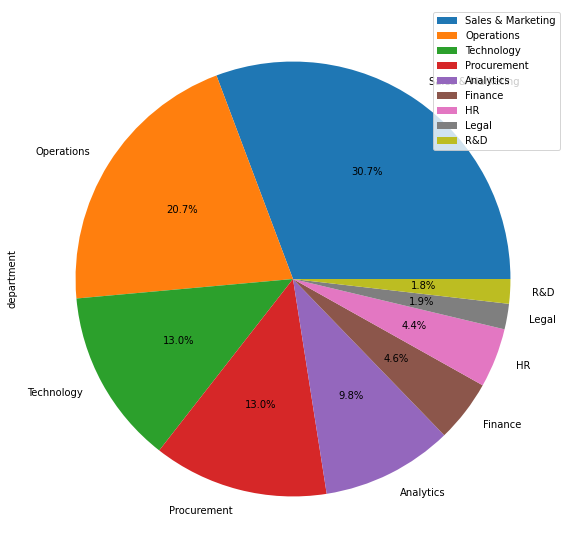

In [17]:
data["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

### We can see that, Sales and marketing department employees data is more than other departments. Its 30% in whole data and on the second number, Oprations department is 20%. 

### region distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

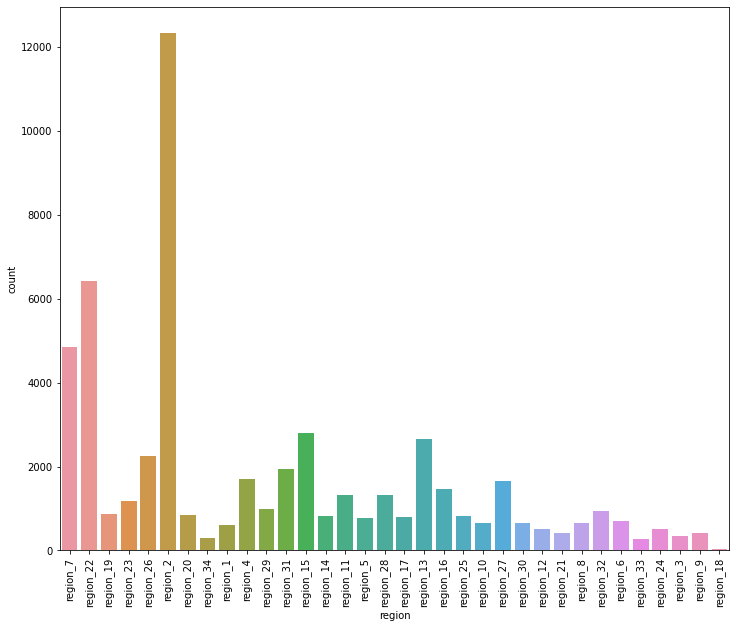

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(data.region)
plt.xticks(rotation=90)

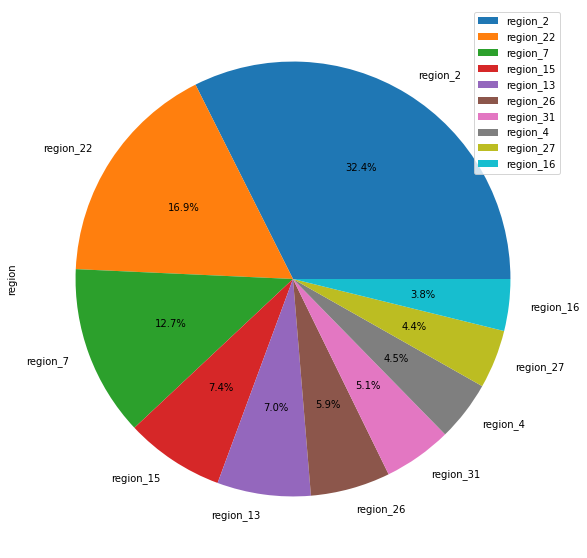

In [19]:
data["region"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### If we look at the region, region_2 is more in counts with 32% and region_22 is 16% and region_7 is 12%. It means that these three regions cover almost 60% data.  

### education distribution

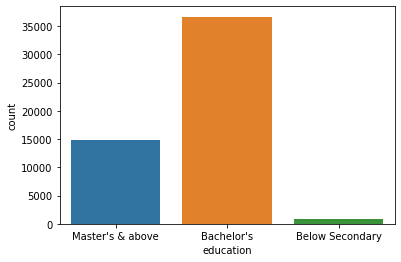

In [20]:
sns.countplot(data= data, x = "education")
plt.show()

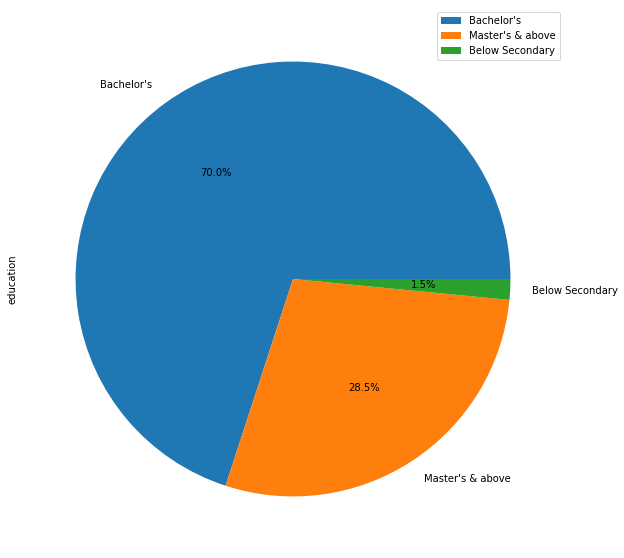

In [21]:
data["education"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### If we look at the education of employees, Bacherlors are too much with 70% data, 28% Master and 1.5 below secondary education. 

### gender distribution

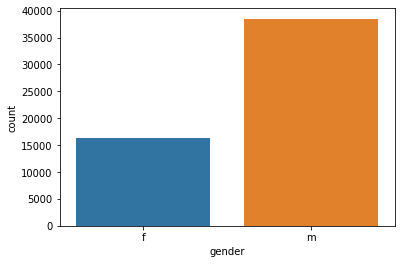

In [22]:
sns.countplot(data= data, x = "gender")
plt.show()

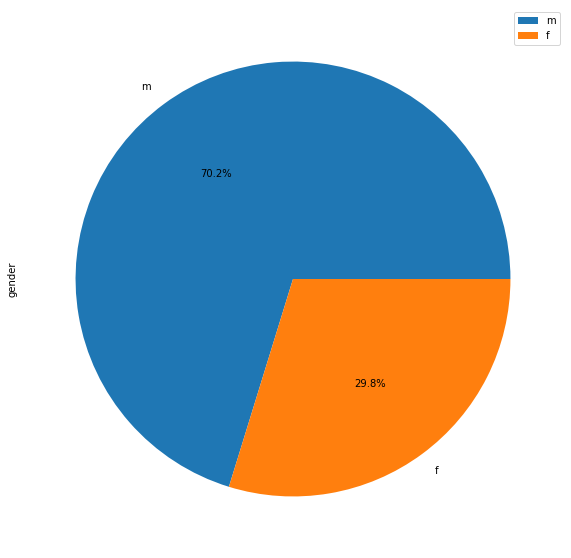

In [23]:
data["gender"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### If we look at the gender, males are too much again with amlost 38K data and females 16K. 

### recruitment_channel distribution

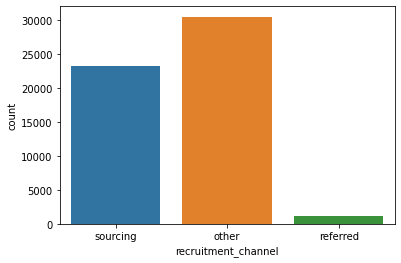

In [24]:
sns.countplot(data= data, x = "recruitment_channel")
plt.show()

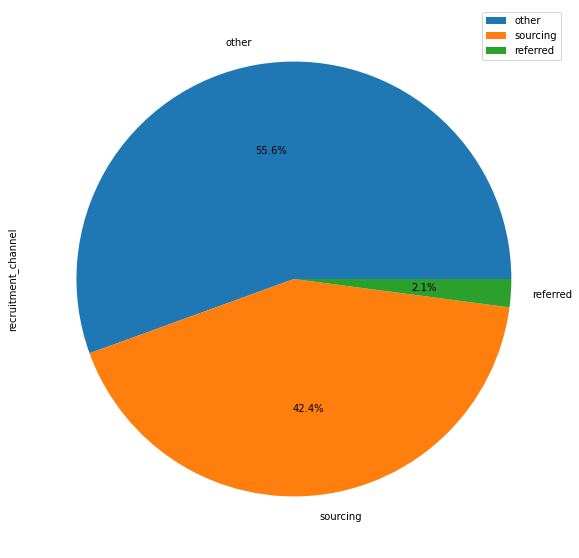

In [25]:
data["recruitment_channel"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### In the recruitment_channel, other are 55%,referred cases are 2% and sourcing 42%.

### no_of_trainings distribution

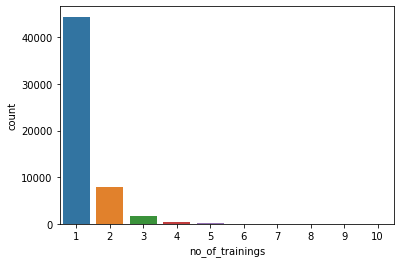

In [26]:
sns.countplot(data= data, x = "no_of_trainings")
plt.show()

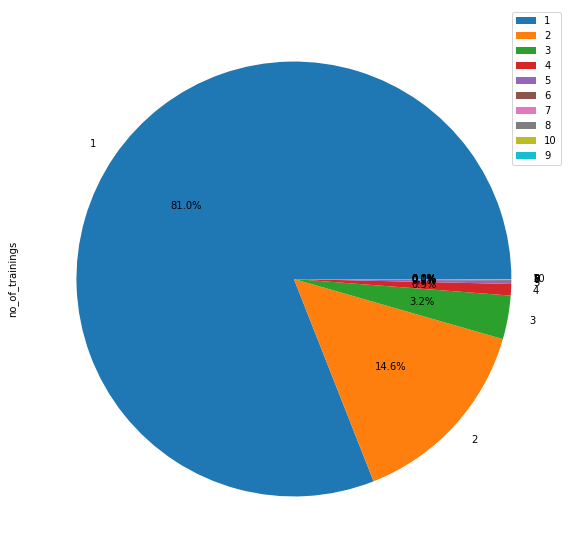

In [27]:
data["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### If we look at the no_of_trainings, all employees participated one time with 81%. 

### age distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53'),
  Text(34, 0, '54'),
  Text(35, 0, '55'),
  Text(36, 0, '56'),
  Text(37, 0, '57'),
  Text(38, 0, '58'),
 

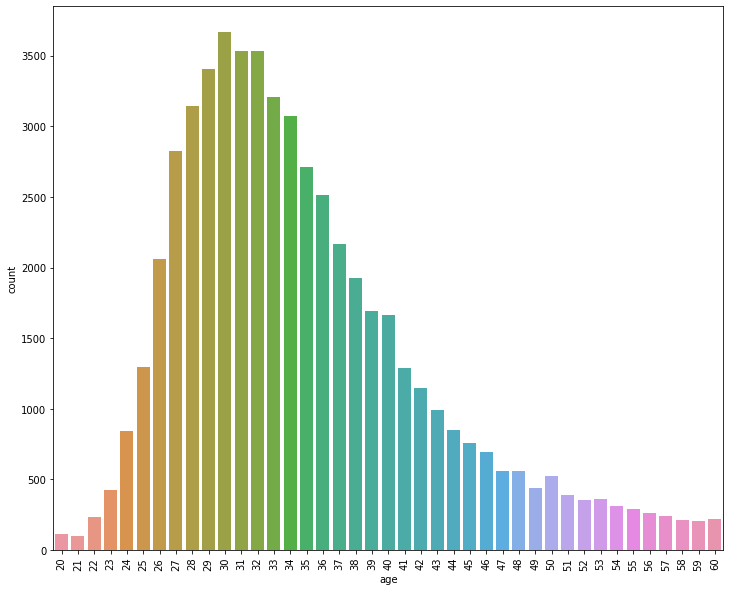

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(data.age)
plt.xticks(rotation=90)

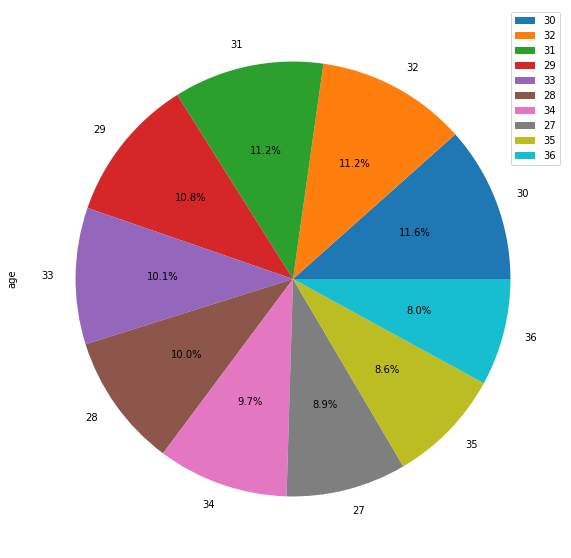

In [29]:
data["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### In the age, most ages are between 27 to 36 years. 

### previous_year_rating distribution

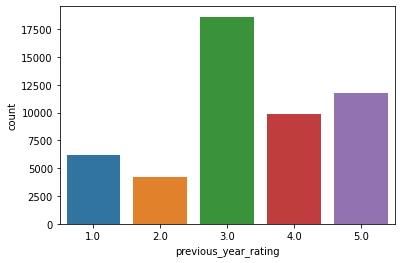

In [30]:
sns.countplot(data= data, x = "previous_year_rating")
plt.show()

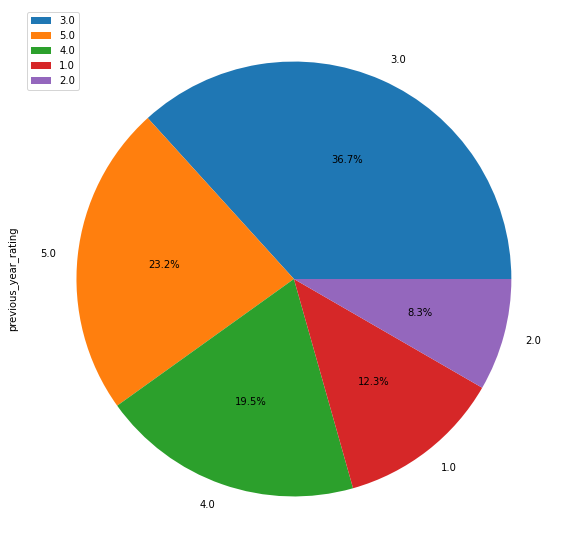

In [31]:
data["previous_year_rating"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### Rating 3 is most used for the employees in all data with 36%. 5 rating with 23%. 

### length_of_service distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '37')])

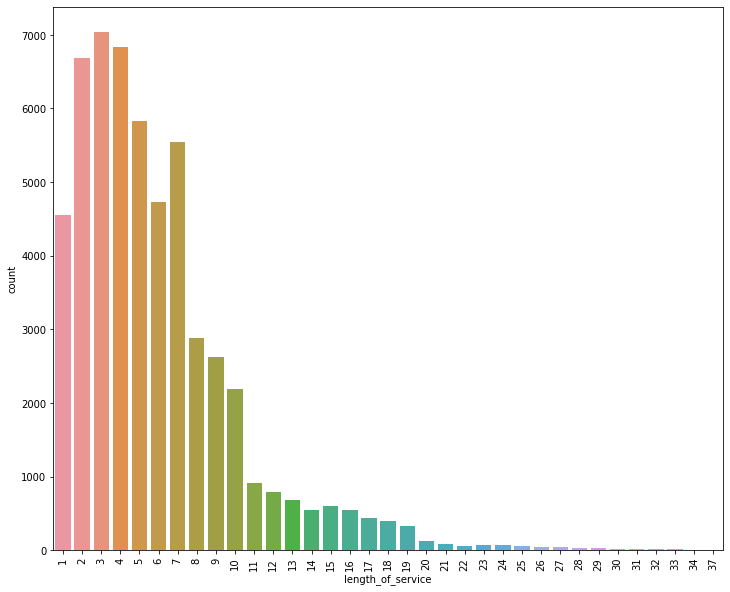

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(data.length_of_service)
plt.xticks(rotation=90)

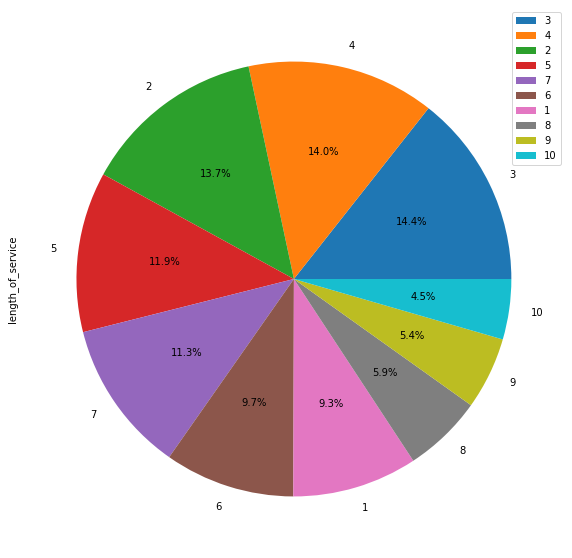

In [33]:
data["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### Length of service is from 1 to 10 years. After 10 years, there are few employees.

### awards_won distribution

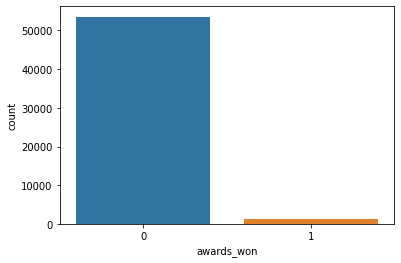

In [34]:
sns.countplot(data= data, x = "awards_won")
plt.show()

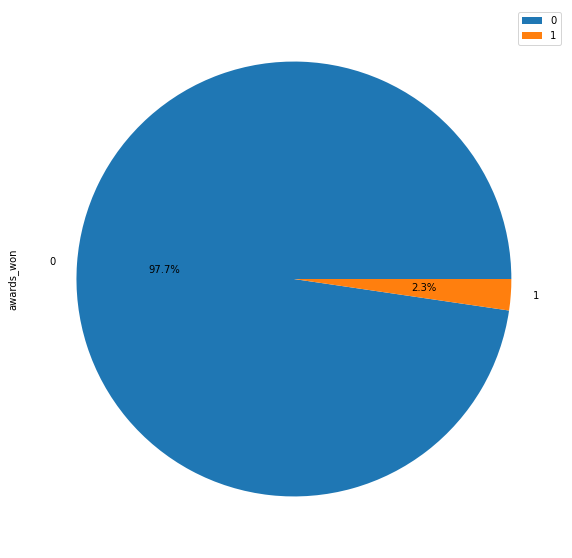

In [35]:
data["awards_won"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### Only 2.3% employees won the awards and 97.7% did not won. Looking at awards, its very less ratio. 

### avg_training_score distribution

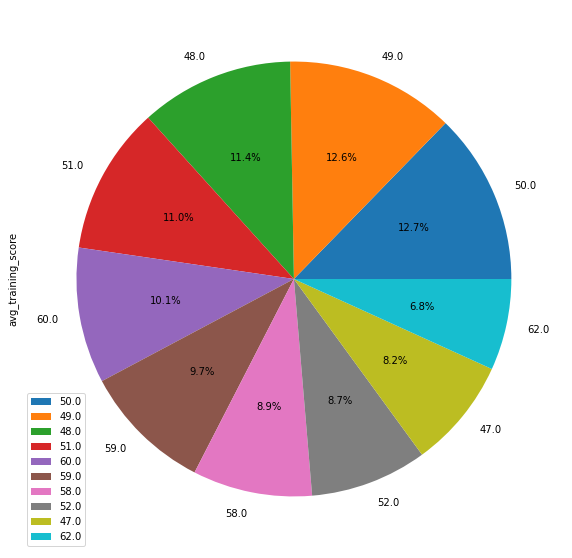

In [36]:
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

### is_promoted distribution

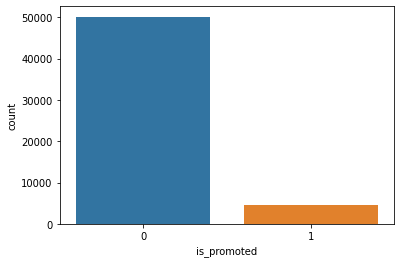

In [37]:
sns.countplot(data= data, x = "is_promoted")
plt.show()

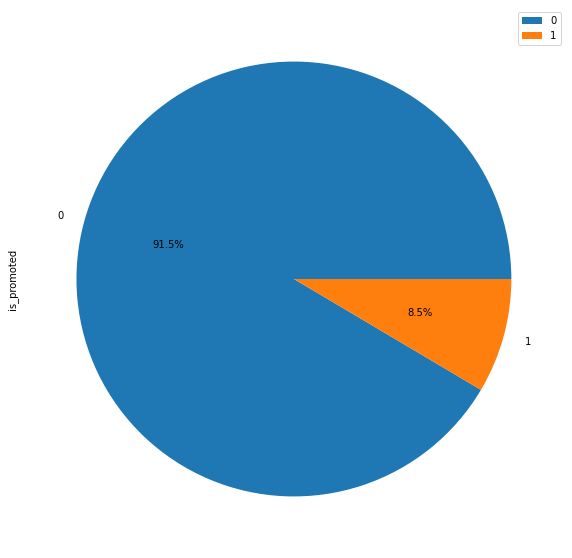

In [38]:
data["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

In [39]:
data["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

### We can clearly see that, the data is not balanced. The promoted employees are only 4668 and not promoted employees are 50140. 91% and 9% ratio is very unbalanced. 

### Distribution of promoted employees ratio across different no_of_trainings

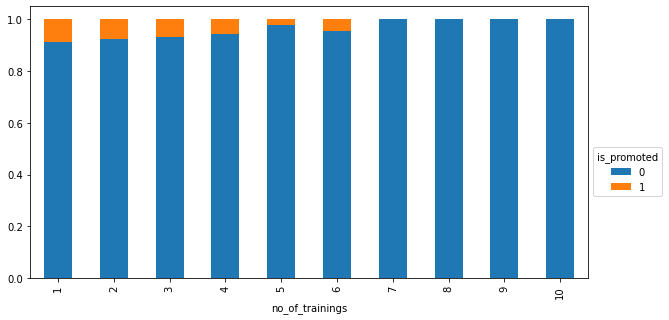

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.no_of_trainings,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

From no of trainings 1 to 6, employees are promoted. From no of trainings 7 to 10, employees are not promoted.

### Distribution of promoted employees ratio across different previous_year_rating

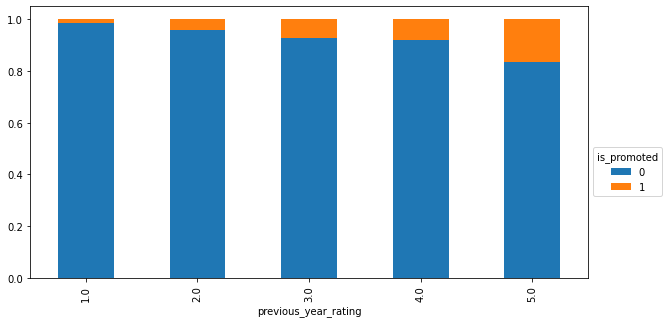

In [41]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.previous_year_rating,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Previous year training matter for employee promotion. As we can see that more years training means more employees promoted.

### Distribution of promoted employees ratio across different length_of_service

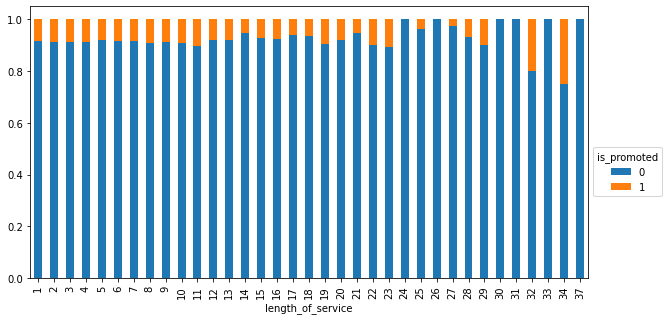

In [42]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.length_of_service,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

From year of service 1 to 23, employees promoted but in after 24 years of service, peoples are often promoted.

### Distribution of promoted employees ratio across different awards_won

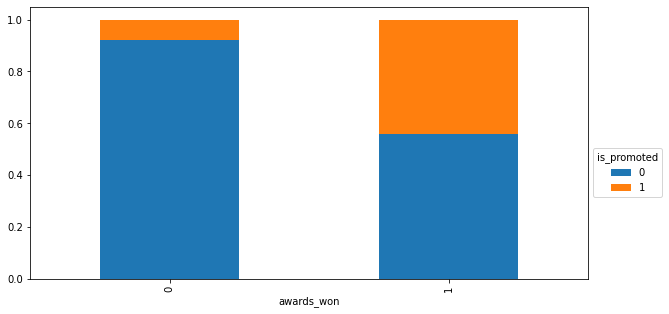

In [43]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.awards_won,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

Wining awards means more chances to get promoted. as we can see that employees with awards have higher count of promotions.

### Distribution of promoted employees ratio across different avg_training_score

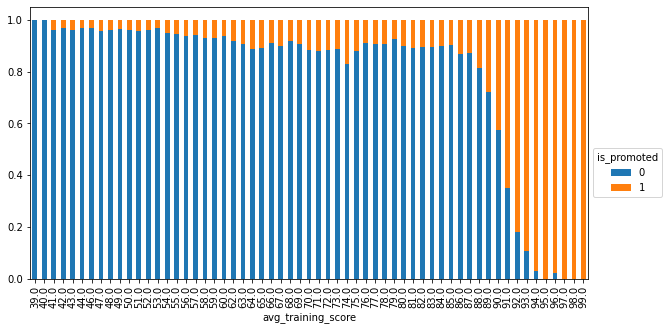

In [44]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(data.avg_training_score,data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

More Training Score means more chances of promotions.

### Checking categorical type columns in the data 

In [45]:
data.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


### Encoding these categorical features into numeric type

In [46]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['department'])
data['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['region'])
data['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['gender'])
data['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'].astype(str))
data['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

As we can see that, we encoded the categorical features into numeric form so we can use them in the models.

## Bivariate Analysis 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

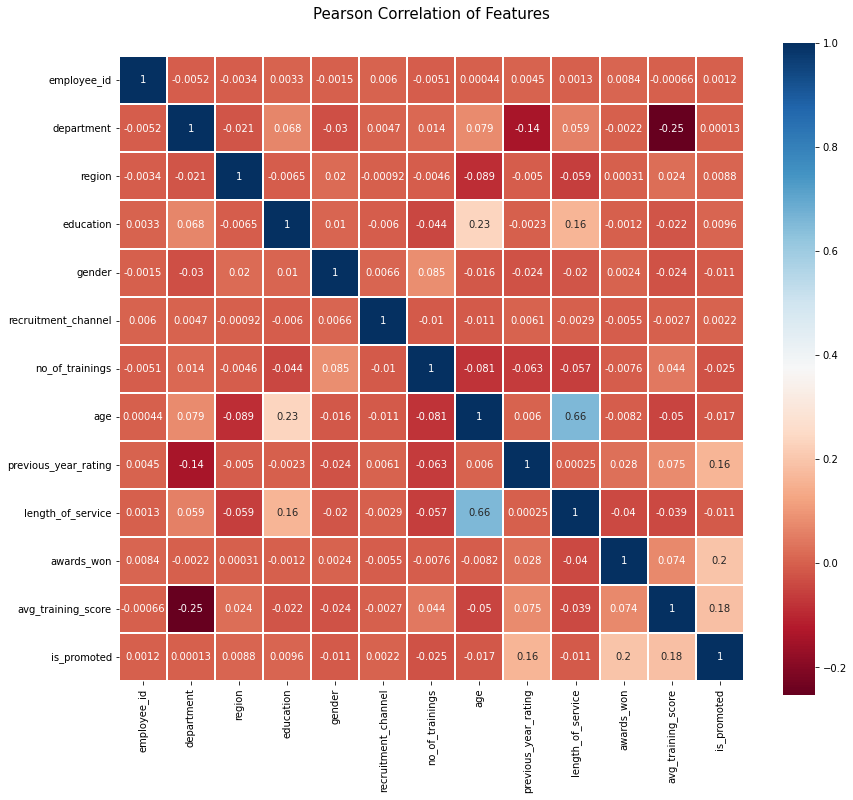

In [47]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#### promoted target is good correlated with the following features:
- employee Id
- deparment 
- region
- education
- recruitement_channel
- previous year rating 
- awards won
- avg training score

#### promoted target is not good correlated with the following features:
- gender 
- no of training 
- age 
- length of service 

### Age plot with is_promoted

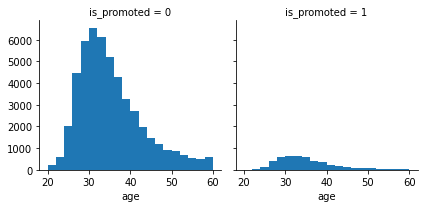

In [48]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'age', bins=20)

### the more ages are with not promoted and less ages are with promoted employees.

### gender plot with is_promoted

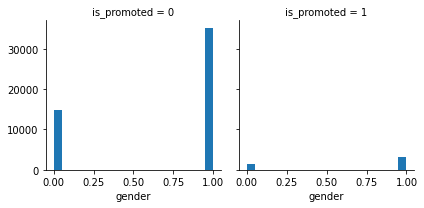

In [49]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'gender', bins=20)

### The counts of gender are more in not promoted and less in promoted. Males are more in both cases.

### recruitment_channel plot with is_promoted

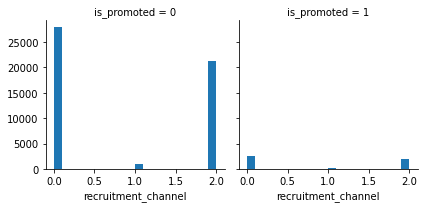

In [50]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'recruitment_channel', bins=20)

### no_of_trainings plot with is_promoted

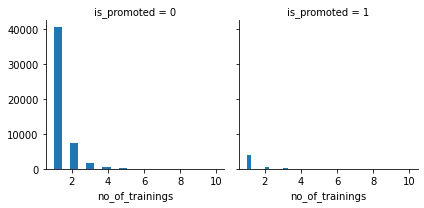

In [51]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

### previous_year_rating plot with is_promoted

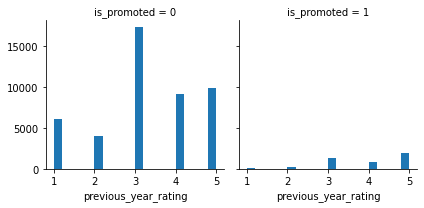

In [52]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'previous_year_rating', bins=20)

### length_of_service plot with is_promoted

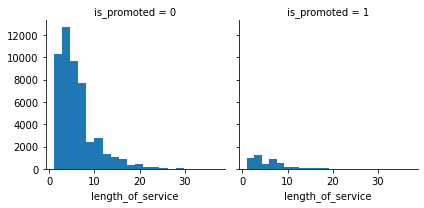

In [53]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

### awards_won plot with is_promoted

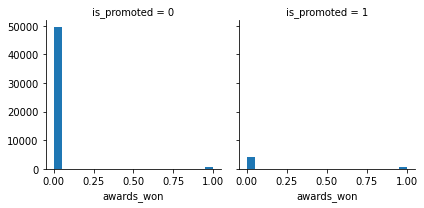

In [54]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'awards_won', bins=20)

### avg_training_score plot with is_promoted

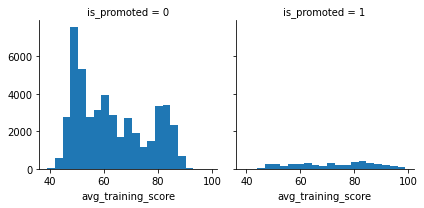

In [55]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

### Pair plot of data

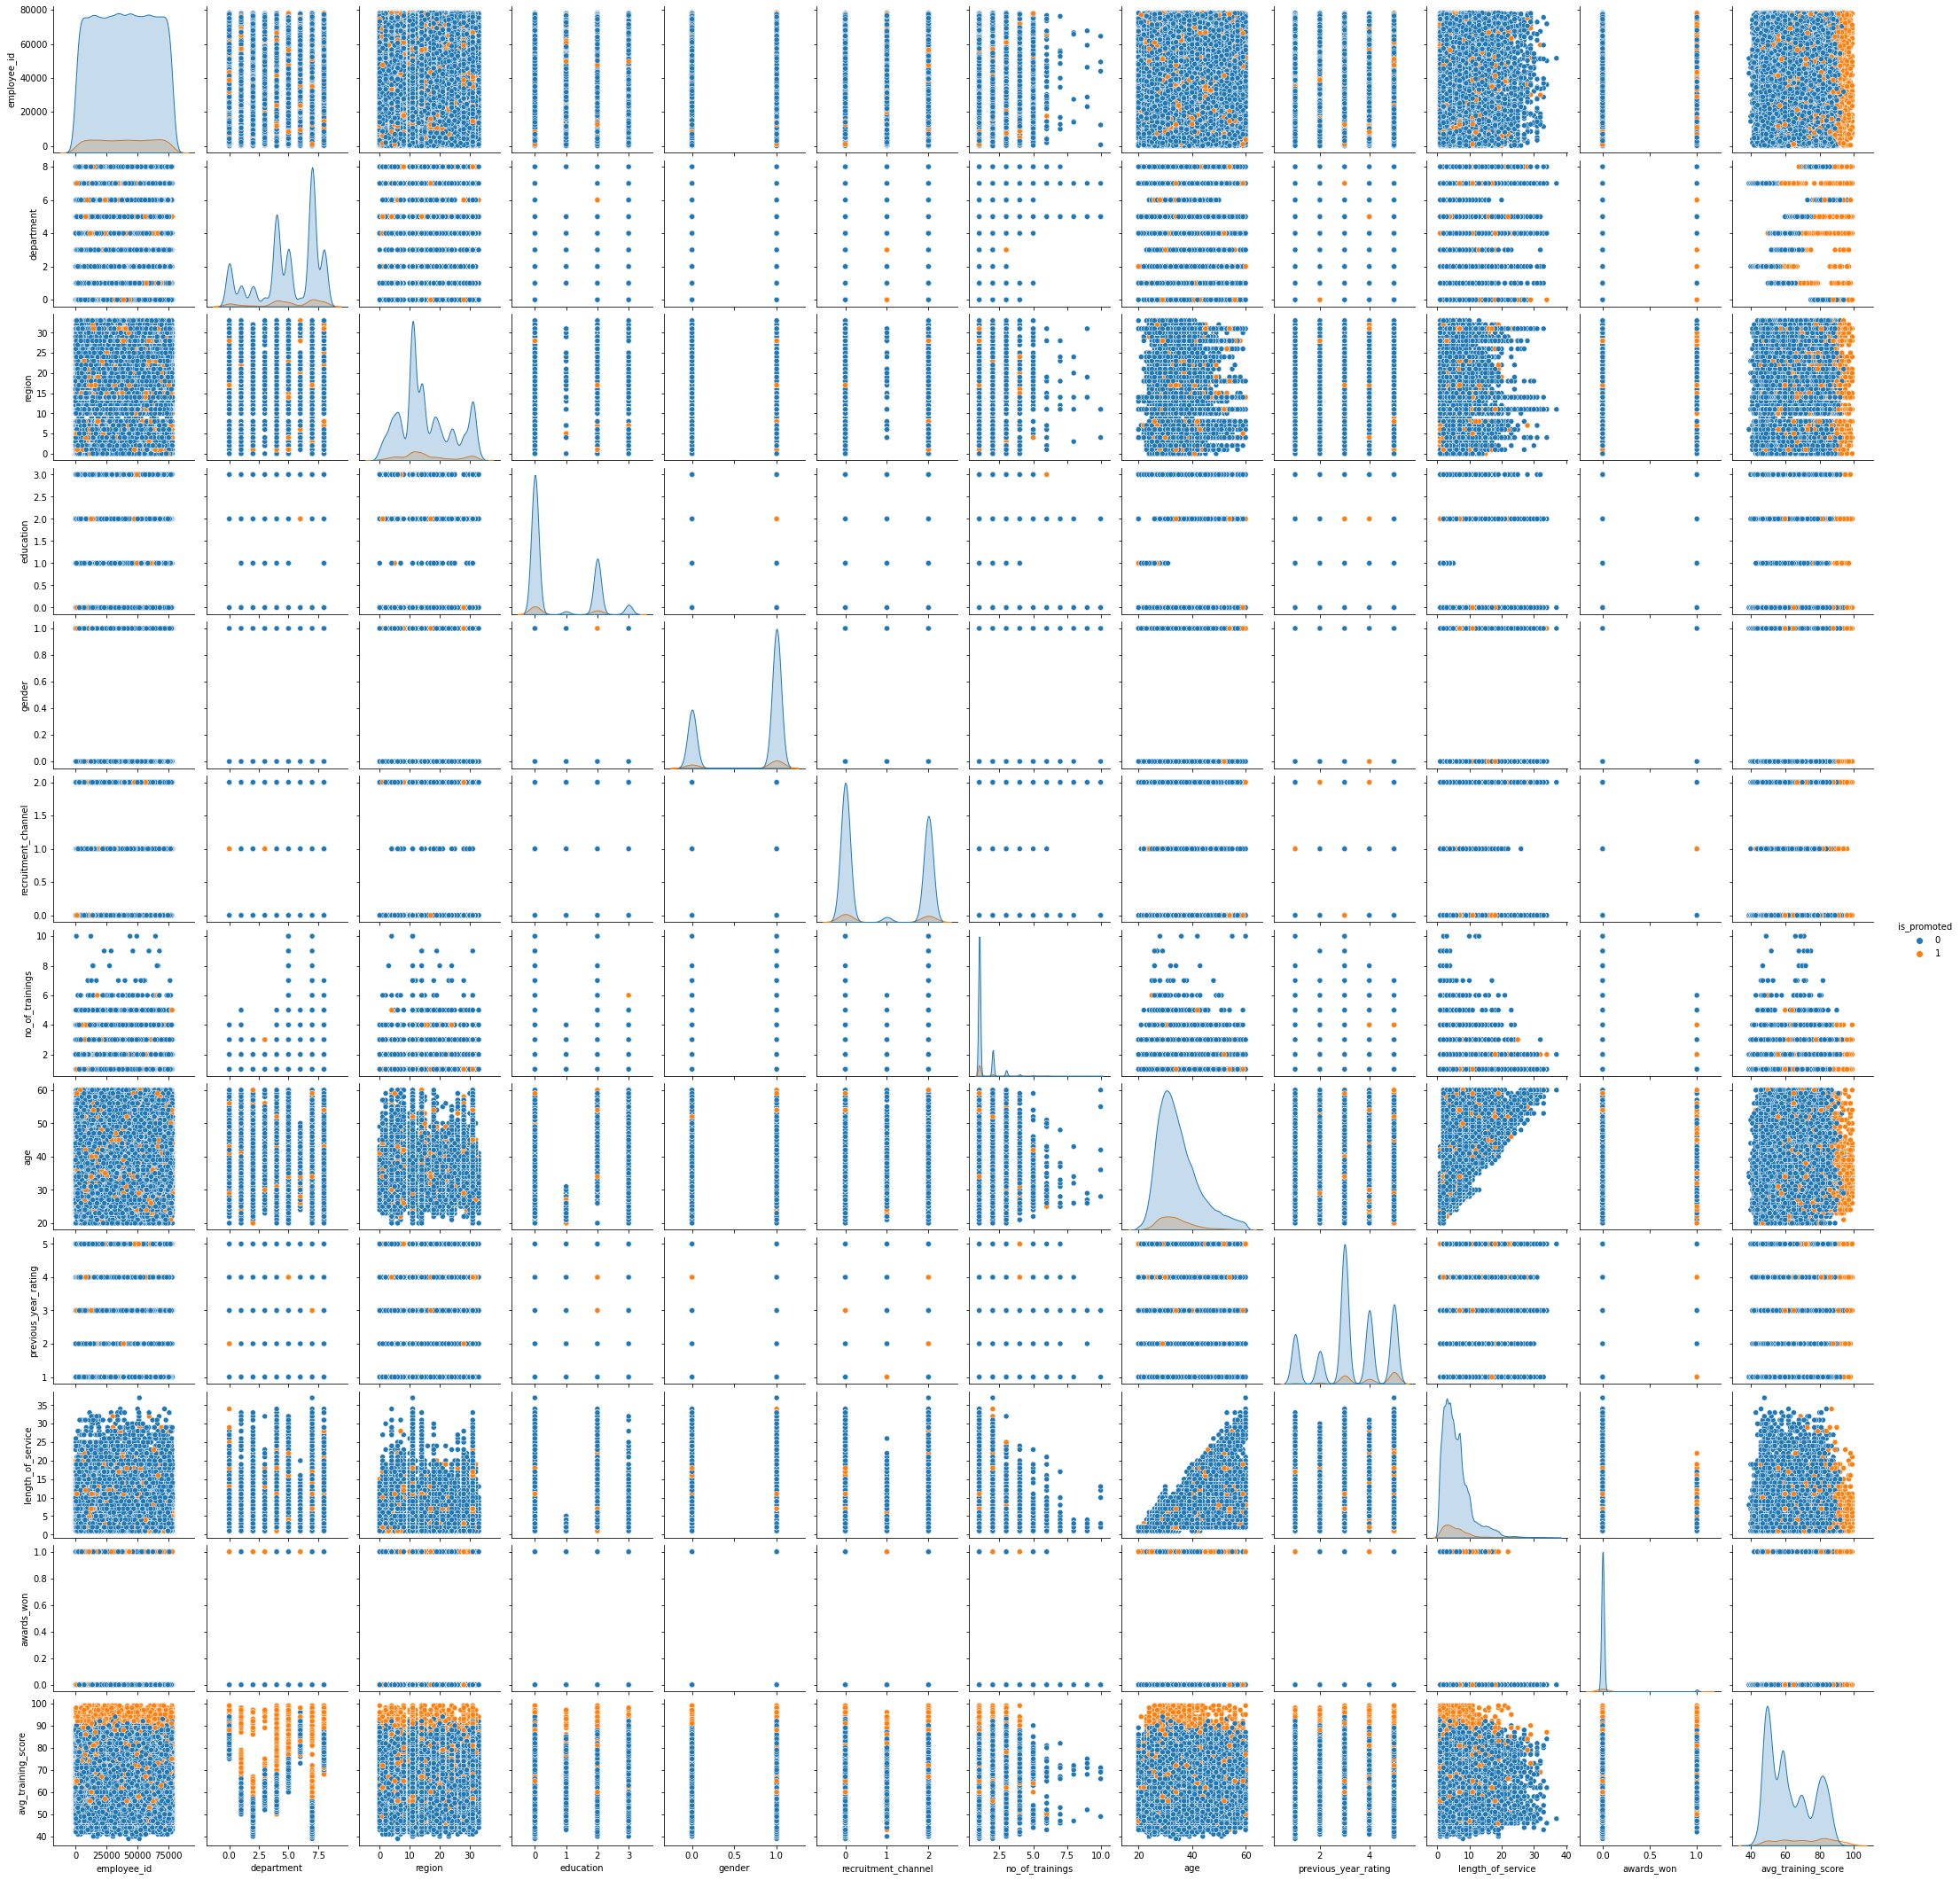

In [56]:
sns.pairplot(data,diag_kind='kde',hue='is_promoted')

### The Pairplot is showing the relationship of all with each other. In some comparisons, the features are distributed more and that is the case of continuous.

<div class="alert alert-block alert-danger">  
<h1><center><strong>Data Preparation 📝</strong></center></h1>


   
        
</div>

### Deleting the duplicate rows

In [57]:
current=len(data)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  54808


In [58]:
data=data.drop_duplicates()

In [59]:
now=len(data)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  54808


In [60]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  0


### Dropping the Employee_Id in the data because it is not useful and helpful for training and helping to predict the employee promotion. 

In [61]:
data=data.drop(columns=['employee_id'])

### Missing value Treatment

In [62]:
data.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [63]:
data.isnull().sum().sum()/len(data)

0.12195299956210773

#### There are almost 16% missing values in the data

### lets calculate the total missing values in the each column

In [64]:
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %
age,0,0.000000
avg_training_score,2560,4.670000
awards_won,0,0.000000
department,0,0.000000
education,0,0.000000
gender,0,0.000000
is_promoted,0,0.000000
length_of_service,0,0.000000
no_of_trainings,0,0.000000
previous_year_rating,4124,7.520000


### working on the previous_year_rating 

In [65]:
py=data[data['previous_year_rating'].isnull()]
py.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,8,15,3,1,2,1,30,NaN,1,0,77.0,0
23,5,29,0,1,0,1,27,NaN,1,0,70.0,0
29,7,28,0,1,2,1,26,NaN,1,0,44.0,0
56,7,24,0,0,0,1,29,NaN,1,0,49.0,0
58,7,7,0,1,0,2,27,NaN,1,0,47.0,0


In [66]:
py['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

Since the length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits with 1 year experience. So they may not be having the previous year rating.We impute 0 for the null values.

In [67]:
data['previous_year_rating'].fillna(value=0,inplace=True)

### Working on the Education and Previous_Year_rating

In [68]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [69]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

Now we dont have any any missing values in the features.

<b> <h3> Target : </h3></b>  Target are the Results like in this project 1 and 0 are Target. 

<b> <h3> Inputs : </h3></b>  Inputs are the data features that we feed into model like in this project department, region,education,gender are the inputs. 

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to tensorflow model so that model can learn from the data.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the Target and then we compare the true Target with predictions and get the performance of the model.

####  Separating input feature and label

In [70]:
X=data.drop(columns=['is_promoted'])
y=data['is_promoted']

<div class="alert alert-block alert-info">  
<h2><center><strong> Model building - Logistic Regression</strong></center></h2>
        
</div>

<div class="alert alert-block alert-info">  
<h4>Make logistic regression with upsampled data</h4>
        
</div>

In [71]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

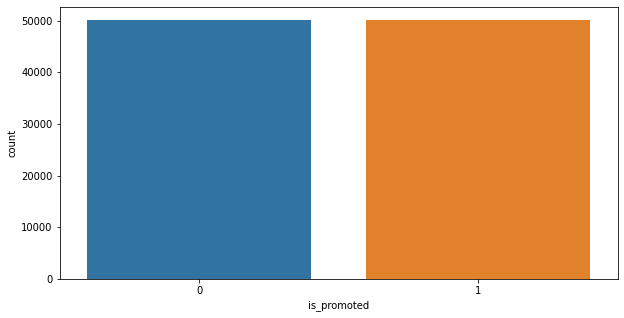

In [72]:
sns.countplot(data= data, x = y_up)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the data, now we are separating/splitting the all data into training data and testing data.
- 70% data will be used in the training 
- 30% data will be used to test the performance of the model.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Training the  Random Forest Model

In [74]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

## Evaluation of Trained model on test data

#### Accuracy
- Accuracy is the number of correctly classify the promoted and notpromoted. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [75]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.95


#### Getting prediction of the test data and then we will compare the true Target/classes of the data with predictions

In [76]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

#### Precision Score on test data
- Precision measure the number of positive class predictions that actually belong to the positive class

In [77]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

Precision 0.951 %


#### Recall Score on test data
- Recall measures the number of positive class predictions made out of all positive records in the dataset

In [78]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

Recall 0.951 %


#### F1 Measure Score on test data
- F-Measure is the average of the precision and recall. 

In [79]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')

F1 0.95 %


<div class="alert alert-block alert-info">  
<h4>Logistic regression with downsampled data</h4>
        
</div>

In [80]:
data["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [81]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22823,7,4,0,1,0,1,24,5.0,2,0,46.0,0
52674,4,6,0,1,2,1,54,2.0,19,0,66.0,0
39107,4,7,0,0,0,1,43,3.0,6,0,62.0,0
48376,7,29,0,1,0,2,27,3.0,4,0,47.0,0


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

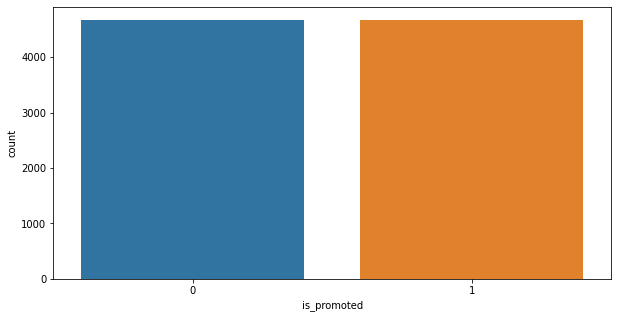

In [82]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the data, now we are separating/splitting the all data into training data and testing data.
- 70% data will be used in the training 
- 30% data will be used to test the performance of the model.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Training the Random Forest  Model

In [84]:
LR=RandomForestClassifier()
LR= LR.fit(X_train , y_train)
LR

RandomForestClassifier()

## Evaluation of Trained model on test data

#### Accuracy
- Accuracy is the number of correctly classify promoted or not promoted. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [85]:
print('Test set\n  Accuracy: {:0.2f}'.format(LR.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.69


#### Getting prediction of the test data and then we will compare the true Target/classes of the data with predictions

In [86]:
y_pred = LR.predict(X_test) #getting predictions on the trained model

#### Precision Score on test data
- Precision measure the number of positive class predictions that actually belong to the positive class

In [87]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

Precision 0.689 %


#### Recall Score on test data
- Recall measures the number of positive class predictions made out of all positive records in the dataset

In [88]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

Recall 0.689 %


#### F1 Measure Score on test data
- F-Measure is the average of the precision and recall. 

In [89]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')

F1 0.69 %


<div class="alert alert-block alert-info">  
<h2><center><strong> Model building - Bagging and Boosting</strong></center></h2>
        
</div>

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-success">  
<h4>Decision Tree Model</h4>
        
</div>

In [91]:
DT=DecisionTreeClassifier()
DT= DT.fit(X_train , y_train)
DT

DecisionTreeClassifier()

In [92]:
dt=DT.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(DT.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.88


<div class="alert alert-block alert-success">  
<h4>Random Forest Classifier Model</h4>
        
</div>

In [93]:
RN=RandomForestClassifier()
RN= RN.fit(X_train , y_train)
RN

RandomForestClassifier()

In [94]:
rn=RN.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(RN.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.93


<div class="alert alert-block alert-success">  
<h4>Bagging Classifier Model</h4>
        
</div>

In [95]:
BC=BaggingClassifier()
BC= BC.fit(X_train , y_train)
BC

BaggingClassifier()

In [96]:
bc=BC.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(BC.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.93


<div class="alert alert-block alert-success">  
<h4>XGB Classifierr Model</h4>
        
</div>

In [97]:
XG=XGBClassifier(verbosity = 0)
XG= XG.fit(X_train , y_train)
XG

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [98]:
xg=XG.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(XG.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.94


<div class="alert alert-block alert-success">  
<h4>AdaBoost Classifier Model</h4>
        
</div>

In [99]:
AD=AdaBoostClassifier()
AD= AD.fit(X_train , y_train)
AD

AdaBoostClassifier()

In [100]:
ad=AD.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(AD.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.92


<div class="alert alert-block alert-success">  
<h4>Gradient Boosting Classifier Model</h4>
        
</div>

In [101]:
GB=GradientBoostingClassifier()
GB= GB.fit(X_train , y_train)
GB

GradientBoostingClassifier()

In [102]:
gb=GB.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(GB.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.94


<div class="alert alert-block alert-danger">  
<h1><center><strong>Comparison of Bagging and Boosting Models</strong></center></h1>
        
</div>

In [103]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["Decision Tree Model", round(dt,2)])
x.add_row(["Random Forest Classifier Model", round(rn,2)])
x.add_row(["Bagging Classifier Model", round(bc,2)])
x.add_row(["XGB Classifierr Model", round(xg,2)])
x.add_row(["AdaBoost Classifier Model", round(ad,2)])
x.add_row(["Gradient Boosting Classifier Model", round(gb,2)])

print(x)
print('\n')



+------------------------------------+----------+
|               Model                | Accuracy |
+------------------------------------+----------+
|        Decision Tree Model         |   0.88   |
|   Random Forest Classifier Model   |   0.93   |
|      Bagging Classifier Model      |   0.93   |
|       XGB Classifierr Model        |   0.94   |
|     AdaBoost Classifier Model      |   0.92   |
| Gradient Boosting Classifier Model |   0.94   |
+------------------------------------+----------+




XGBoost and Gradient Decent models are giving highest accuracy with 94% which is good. But Decision tree model is lower than others with only 88% accuracy. Random forest,Bagging and Adaboost also performed well with 93% accuracy. 

<div class="alert alert-block alert-info">  
<h2><center><strong> Hyperparameter Tuning using Grid Search</strong></center></h2>
    <li> Random Forest Model</li>
    <li> XGB Classifierr Model</li>
    <li> Gradient Boosting Classifier Model</li>
        
</div>

<div class="alert alert-block alert-success">  
<h4>Random Forest Classifier Model</h4>
        
</div>

In [104]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [105]:
start = time.time()
RN=RandomForestClassifier()
Grid_RN = GridSearchCV(estimator=RN, param_grid=param_grid, cv= 2)
Grid_RN.fit(X_train, y_train)
end = time.time()
RF_time1=end-start

In [106]:
Grid_RN.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [107]:
print('Execution time is ', RF_time1)

Execution time is  547.8603093624115


#### Recall Score on test data

In [108]:
y_pred = Grid_RN.predict(X_test) #getting predictions on the trained model
rn1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.925 %


The model is giving good results and taking more time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

<div class="alert alert-block alert-success">  
<h4>XGB Classifier Model</h4>
        
</div>

In [109]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [110]:
start = time.time()
XGB=XGBClassifier(verbosity = 0)
Grid_XG = GridSearchCV(estimator=XGB, param_grid=params, cv= 2)
Grid_XG.fit(X_train, y_train)
end = time.time()
XG_time1=end-start

In [111]:
Grid_XG.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

In [112]:
print('Execution time is ', XG_time1)

Execution time is  450.92167615890503


#### Recall Score on test data

In [113]:
y_pred = Grid_XG.predict(X_test) #getting predictions on the trained model
xg1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.941 %


The XGboost model is giving more than 94% recall but the training time is more. It would be great if the training time less.

<div class="alert alert-block alert-success">  
<h4>Gradient Boosting Classifier Model</h4>
        
</div>

In [114]:
param = {
    "learning_rate": [0.01, 0.025],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    }

In [ ]:
start = time.time()
BC=GradientBoostingClassifier()
Grid_BC = GridSearchCV(estimator=BC, param_grid=param, cv= 2)
Grid_BC.fit(X_train, y_train)
end = time.time()
BC_time1=end-start

In [ ]:
print('Execution time is ', BC_time1)

#### Recall Score on test data

In [ ]:
y_pred = Grid_BC.predict(X_test) #getting predictions on the trained model
gc1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Gradient Boosting model outform over random Forest modelbut XGboost is still good. Also it took very long time to train the model.It is not a good thing to take a lot of time on training. 

<div class="alert alert-block alert-info">  
<h2><center><strong> Hyperparameter Tuning using Random Search</strong></center></h2>
    <li> Random Forest Model</li>
    <li> XGB Classifierr Model</li>
    <li> Gradient Boosting Classifier Model</li>
        
</div>

<div class="alert alert-block alert-success">  
<h4>Random Forest Classifier Model</h4>
        
</div>

In [ ]:
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
start = time.time()
RN=RandomForestClassifier()
Grid_RN = RandomizedSearchCV(estimator = RN, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_RN.fit(X_train, y_train)
end = time.time()
RF_time2=end-start

In [ ]:
Grid_RN.best_params_

In [ ]:
print('Execution time is ', RF_time2)

#### Recall Score on test data

In [ ]:
y_pred = Grid_RN.predict(X_test) #getting predictions on the trained model
rn2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

The model is giving good results and taking reasonable time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

<div class="alert alert-block alert-success">  
<h4>XGB Classifier Model</h4>
        
</div>

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
start = time.time()
XGB=XGBClassifier(verbosity = 0)
Grid_XG = RandomizedSearchCV(estimator = XGB, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_XG.fit(X_train, y_train)
end = time.time()
XG_time2=end-start

In [ ]:
Grid_XG.best_params_

In [ ]:
print('Execution time is ', XG_time2)

#### Recall Score on test data

In [ ]:
y_pred = Grid_XG.predict(X_test) #getting predictions on the trained model
xg2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

The XGboost model is giving more than 94% recall and also taking less time as compare to other models.

<div class="alert alert-block alert-success">  
<h4>Gradient Boosting Classifier Model</h4>
        
</div>

In [ ]:
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618],
    "n_estimators":[10]
    }

In [ ]:
start = time.time()
BC=GradientBoostingClassifier()
Grid_BC = RandomizedSearchCV(estimator = BC, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_BC.fit(X_train, y_train)
end = time.time()
BC_time2=end-start

In [ ]:
Grid_BC.best_params_

In [ ]:
print('Execution time is ', BC_time2)

#### Recall Score on test data

In [ ]:
y_pred = Grid_BC.predict(X_test) #getting predictions on the trained model
bc2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

The results of gradient boosting are not good as compare to other models as XGBoost giving more than 94% accuracy.

<div class="alert alert-block alert-info">  
<h1><center><strong>Model Performances</strong></center></h1>
        
</div>

<div class="alert alert-block alert-danger">  
<h1><center><strong>Comparison of Bagging and Boosting Models using Hyperparameter Tuning using Grid Search</strong></center></h1>
        
</div>

<div class="alert alert-block alert-success">  
<h4>Evaluation</h4>
        
</div>

In [ ]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Recall Metric"]

x.add_row(["Random Forest Classifier Model", round(rn1,2)])
x.add_row(["XGB Classifierr Model", round(xg1,2)])
x.add_row(["Gradient Boosting Classifier Model", round(gc1,2)])

print(x)
print('\n')

<div class="alert alert-block alert-success">  
<h4>Execution Time</h4>
        
</div>

In [ ]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Execution Time"]

x.add_row(["Random Forest Classifier Model", round(RF_time1,2)])
x.add_row(["XGB Classifierr Model", round(XG_time1,2)])
x.add_row(["Gradient Boosting Classifier Model", round(BC_time1,2)])

print(x)
print('\n')

The model is giving good results and taking more time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

The XGboost model is giving more than 94% recall but the training time is more. It would be great if the training time less.

Gradient Boosting model outform over random Forest modelbut XGboost is still good. Also it took very long time to train the model.It is not a good thing to take a lot of time on training. 

<div class="alert alert-block alert-danger">  
<h1><center><strong>Comparison of Bagging and Boosting Models using Hyperparameter Tuning using Random Search</strong></center></h1>
        
</div>

<div class="alert alert-block alert-success">  
<h4>Evaluation</h4>
        
</div>

In [ ]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Recall Metric"]

x.add_row(["Random Forest Classifier Model", round(rn2,2)])
x.add_row(["XGB Classifierr Model", round(xg2,2)])
x.add_row(["Gradient Boosting Classifier Model", round(bc2,2)])

print(x)
print('\n')

<div class="alert alert-block alert-success">  
<h4>Execution Time</h4>
        
</div>

In [ ]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Execution Time"]

x.add_row(["Random Forest Classifier Model", round(RF_time2,2)])
x.add_row(["XGB Classifierr Model", round(XG_time2,2)])
x.add_row(["Gradient Boosting Classifier Model", round(BC_time2,2)])

print(x)
print('\n')

Same performance and comments on the random search because we got the same kind of results. 

The model is giving good results and taking reasonable time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

The XGboost model is giving more than 94% recall and also taking less time as compare to other models.

The results of gradient boosting are not good as compare to other models as XGBoost giving more than 94% accuracy.

On Random Search,the models took less training time and got the same accuracy on all models as compared to Grid search.

<div class="alert alert-block alert-info">  
<h1><center><strong>Actionable Insights & Recommendations 📝</strong></center></h1>
    <p>
<li>We used the Employee promotion dataset and explored the data with different ways.</li>
        <li>While Technology department had highest percentage of employees getting promoted, Legal department has the least number. But we don't see major differences in terms of percentages.
</li>
        <li>According to the data, percentage of promotions is higher among the employees who got recruited through referrals.
</li>
        <li>The ratio of promoted employees increases with previous year rating which is quite obvious.
 </li>
        <li>Promotions ratio increases with the score and the ratio is very high in 90-100 range which means getting promoted is highly dependent on the average score
 </li>
          <li>Ratio doesn't vary much with the employees age.</li>
        <li>Promotions are majorly dependent on the training score and not on age</li>
        <li>It is recommneded to manage the data of employees with all checkpoints like previous year rating is important but it contains a lot of missing values. </li>
        <li>The data is not balanced with promoted employees and not employee but the above facts clealry tell us that which employees can be promoted.</li>
         <li>We trained the model with over sampling but the results were not satisfactory because we over sampled the promoted records 98%.</li>
        <li>We trained the model with under sampling but the results were not satisfactory again and it was because we under sampled the not promoted records 48%</li>
        <li>We trained the models with Bagging and Boosting and got the good results. </li>
        <li>After that we applied the grid search and random search techniques to train the models.  </li>
        <li>We evaluated th model with different evaluation measures to check the performance on all techniques that we applied. </li>
           <li>XGBoost Model gave us the good results with 94% as well as took very less time as compare to other models.  </li>
         <li>HR department can use the final model of XGBoost and can feed the previous record of the employee and can get prediction that the employee should be promoted or not. </li>
        </p>
</div>